In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget https://dlcdn.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz

--2022-05-26 06:48:04--  https://dlcdn.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220400553 (210M) [application/x-gzip]
Saving to: ‘spark-3.0.3-bin-hadoop2.7.tgz.1’

spark-3.0.3-bin-had 100%[===================>] 210.19M   125MB/s    in 1.7s    

2022-05-26 06:48:05 (125 MB/s) - ‘spark-3.0.3-bin-hadoop2.7.tgz.1’ saved [220400553/220400553]



In [ ]:
!tar xvf spark-3.0.3-bin-hadoop2.7.tgz

spark-3.0.3-bin-hadoop2.7/
spark-3.0.3-bin-hadoop2.7/NOTICE
spark-3.0.3-bin-hadoop2.7/kubernetes/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.3-bin-hadoop2.7/jars/
spark-3.0.3-bin-hadoop2.7/jars/jacks

In [ ]:
!pip install -q findspark

In [ ]:
!pip install pyspark==3.0.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.0.3-bin-hadoop2.7"

In [ ]:
from pyspark.sql import SparkSession
APP_NAME = "INFO607_Project"
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()
spark

**Read dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pathway ='/content/gdrive/MyDrive/INFO607_project/heart.csv'

In [ ]:
heart_df = spark.read.csv(pathway, header = True)
heart_df.show(5,truncate=False)

+---+---+---+----------------+----------------------+-----------+-------------------+----------------------------+------------------+-----------------------+-------+---+-----------------+-----+---------------------------+
|_c0|age|sex|chestPain       |resting_blood_pressure|cholestoral|fasting_blood_sugar|resting_electrocardiographic|maximum_heart_rate|exercise_induced_angina|oldpeak|slp|number_of_vessels|thall|output                     |
+---+---+---+----------------+----------------------+-----------+-------------------+----------------------------+------------------+-----------------------+-------+---+-----------------+-----+---------------------------+
|0  |63 |1  |asymptomatic    |145                   |233        |true               |normal                      |150               |no                     |2.3    |0  |0                |1    |more chance of heart attact|
|1  |37 |1  |non-anginal pain|130                   |250        |false              |having ST-T wave abnormalit

In [ ]:
heart_df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- chestPain: string (nullable = true)
 |-- resting_blood_pressure: string (nullable = true)
 |-- cholestoral: string (nullable = true)
 |-- fasting_blood_sugar: string (nullable = true)
 |-- resting_electrocardiographic: string (nullable = true)
 |-- maximum_heart_rate: string (nullable = true)
 |-- exercise_induced_angina: string (nullable = true)
 |-- oldpeak: string (nullable = true)
 |-- slp: string (nullable = true)
 |-- number_of_vessels: string (nullable = true)
 |-- thall: string (nullable = true)
 |-- output: string (nullable = true)



Changing column names.

In [ ]:
heart_df = heart_df.withColumnRenamed('caa','number_of_vessels')
heart_df = heart_df.withColumnRenamed('cp','chestPain')
heart_df = heart_df.withColumnRenamed('trtbps', 'resting_blood_pressure')
heart_df = heart_df.withColumnRenamed('restecg', 'resting_electrocardiographic')
heart_df = heart_df.withColumnRenamed('thalachh','maximum_heart_rate')
heart_df = heart_df.withColumnRenamed('chol','cholestoral')
heart_df = heart_df.withColumnRenamed('exng','exercise_induced_angina')
heart_df = heart_df.withColumnRenamed('fbs','fasting_blood_sugar')
heart_df = heart_df.withColumnRenamed('slp','slope')
heart_df = heart_df.withColumnRenamed('oldpeak','previous_peak')



In [ ]:
heart_df.show(5, truncate = True)

+---+---+---+----------------+----------------------+-----------+-------------------+----------------------------+------------------+-----------------------+-------------+-----+-----------------+-----+--------------------+
|_c0|age|sex|       chestPain|resting_blood_pressure|cholestoral|fasting_blood_sugar|resting_electrocardiographic|maximum_heart_rate|exercise_induced_angina|previous_peak|slope|number_of_vessels|thall|              output|
+---+---+---+----------------+----------------------+-----------+-------------------+----------------------------+------------------+-----------------------+-------------+-----+-----------------+-----+--------------------+
|  0| 63|  1|    asymptomatic|                   145|        233|               true|                      normal|               150|                     no|          2.3|    0|                0|    1|more chance of he...|
|  1| 37|  1|non-anginal pain|                   130|        250|              false|        having ST-T wav

Target variable: output. 0= less chance of heart attack, 1= more chance of heart attack. 

In [ ]:
# To see the distribution of target variable.
heart_df.groupBy('output').count().show()

+--------------------+-----+
|              output|count|
+--------------------+-----+
|less chance of he...|  138|
|more chance of he...|  165|
+--------------------+-----+



In [ ]:
heart_df.groupBy('chestPain').count().show()

+----------------+-----+
|       chestPain|count|
+----------------+-----+
|    asymptomatic|   23|
|non-anginal pain|   87|
|  typical angina|  143|
| atypical angina|   50|
+----------------+-----+



In [ ]:
heart_df.groupBy('number_of_vessels').count().show()

+-----------------+-----+
|number_of_vessels|count|
+-----------------+-----+
|                3|   20|
|                0|  175|
|                1|   65|
|                4|    5|
|                2|   38|
+-----------------+-----+



In [ ]:
heart_df.groupBy('resting_electrocardiographic').count().show()

+----------------------------+-----+
|resting_electrocardiographic|count|
+----------------------------+-----+
|        left ventricular ...|    4|
|                      normal|  147|
|        having ST-T wave ...|  152|
+----------------------------+-----+



In [ ]:
heart_df.groupBy('sex').count().show()

+---+-----+
|sex|count|
+---+-----+
|  0|   96|
|  1|  207|
+---+-----+



In [ ]:
heart_df.crosstab('sex', 'output').show()

+----------+---------------------------+---------------------------+
|sex_output|less chance of heart attact|more chance of heart attact|
+----------+---------------------------+---------------------------+
|         1|                        114|                         93|
|         0|                         24|                         72|
+----------+---------------------------+---------------------------+



In [ ]:
heart = heart_df.toPandas()

[Text(0, 0.5, 'count'), Text(0.5, 0, 'heart attack')]

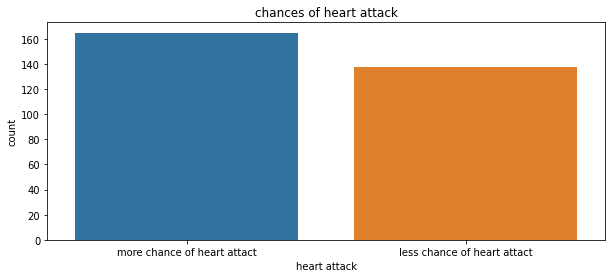

In [ ]:
plt.figure(figsize = (10,4))
plt.title('chances of heart attack')
ax = sns.countplot(x = 'output', data = heart)
ax.set(xlabel = 'heart attack', ylabel = 'count')

In [ ]:
heart.head(5)

,_c0,age,sex,chestPain,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,previous_peak,slope,number_of_vessels,thall,output
0,0,63,1,asymptomatic,145,233,true,normal,150,no,2.3,0,0,1,more chance of heart attact
1,1,37,1,non-anginal pain,130,250,false,having ST-T wave abnormality,187,no,3.5,0,0,2,more chance of heart attact
2,2,41,0,atypical angina,130,204,false,normal,172,no,1.4,2,0,2,more chance of heart attact
3,3,56,1,atypical angina,120,236,false,having ST-T wave abnormality,178,no,0.8,2,0,2,more chance of heart attact
4,4,57,0,typical angina,120,354,false,having ST-T wave abnormality,163,yes,0.6,2,0,2,more chance of heart attact


In [ ]:
heart.output.replace(['0', '1'], ['less chance of heart attact', 'more chance of heart attact'], inplace = True)
heart.chestPain.replace(['0', '1', '2', '3'], ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], inplace = True)
heart.exercise_induced_angina.replace(['0', '1'], ['no', 'yes'], inplace = True)
heart.fasting_blood_sugar.replace(['0', '1'], ['false', 'true'], inplace = True)
heart.resting_electrocardiographic.replace(['0', '1', '2'], ['normal', 'having ST-T wave abnormality', "left ventricular hypertrophy by Estes' criteria"], inplace = True)


In [ ]:
heart.head(2)

,_c0,age,sex,chestPain,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,previous_peak,slope,number_of_vessels,thall,output
0,0,63,1,asymptomatic,145,233,true,normal,150,no,2.3,0,0,1,more chance of heart attact
1,1,37,1,non-anginal pain,130,250,false,having ST-T wave abnormality,187,no,3.5,0,0,2,more chance of heart attact


In [ ]:
heart.to_csv('/content/gdrive/MyDrive/INFO607_project/heart_cleaned.csv')